# A notebook to help marine scientists in fine-tuning ML models for classification tasks based on annotated datasets from squidle.org

In [1]:
from scripts.requests import SQAPI_requests,annotation_set
from scripts.analysis import analysis
from scripts.utils import utils, FineTuningParameters
from scripts.config import Configuration_Classification 
from scripts.fine_tuning import FineTuning
import os

# Loading configurations

In [2]:
config = Configuration_Classification('config_classification.yaml')


set_demo = True #if split annotaton set into one set for finetuning and one set for inference (As if unlabelled subset as a demo)


# Loading API Token and Annotations


In [3]:

utils = utils(config)
SQAPI_requests = SQAPI_requests(config)
SQAPI_requests.load_annotations()


API Token was loaded successfully ✅
HTTP-GET: https://squidle.org/api/annotation_set/16447/export?include_columns=["label.id","label.uuid","label.name","label.lineage_names","comment","needs_review","tag_names","updated_at","point.id","point.x","point.y","point.t","point.is_targeted","point.media.id","point.media.key","point.media.path_best","point.pose.timestamp","point.pose.lat","point.pose.lon","point.pose.alt","point.pose.dep","point.media.deployment.key","point.media.deployment.campaign.key"]&q={"filters":[{"name":"label_id","op":"is_not_null"}]} ... ✅ | 202 | Done in 1.87 s
Task queued (ID:f65fe4bb-ff4f-4056-aad2-41b9479cc979) | checking status...


data.query_to_dicts: 100%|██████████| 930/930 [00:09<00:00, 99.76it/s]      

HTTP-GET: https://squidle.org/task/f65fe4bb-ff4f-4056-aad2-41b9479cc979/result ...

data.query_to_dicts: 100%|██████████| 930/930 [00:11<00:00, 81.40it/s]

 ✅ | 200 | Done in 2.10 s


In [4]:
analysis = analysis(config)

if set_demo:
    df_training, df_inference = analysis.stratified_split(SQAPI_requests.data, label_col='label.name')
    SQAPI_requests.data = df_training
    


Sampled: 232 rows, Remaining: 698 rows


In [5]:
analysis.data = SQAPI_requests.data
annotation_set = annotation_set(config,SQAPI_requests.data)
whole_frame_annotations = annotation_set.get_whole_frame_annotations()
print(whole_frame_annotations)
point_annotations = annotation_set.get_point_annotations()
print(point_annotations)

if set_demo:
    annotation_set.download_set(df = df_training)
    annotation_set.download_set(df = df_inference,suffix = "_inference")

else:

    annotation_set.download_set()

['1.2 Anthropogenic Debris', '1.3 Terrestrial (Natural)']
['Fishes', 'Plastic (i.e. bags, strapping)', 'Sea stars']
    tag_names  needs_review                  updated_at  point.pose.dep  \
432                   False  2024-11-22T20:36:45.114965       58.041530   
661                   False  2024-11-22T21:18:41.210532       76.589647   
591                   False  2024-11-22T21:12:03.203286       59.344694   
553                   False  2024-11-22T20:57:02.668685       60.215647   
256                   False  2024-11-22T20:10:39.416407       55.143748   
..        ...           ...                         ...             ...   
40                    False  2024-11-12T11:22:44.049572       58.762340   
28                    False  2024-11-12T11:21:40.106468       59.012749   
20                    False  2024-11-12T11:11:16.773477       61.626537   
23                    False  2024-11-12T11:19:59.403355       59.036519   
913                   False  2024-11-23T10:24:54.741072    

Download complete.
    tag_names  needs_review                  updated_at  point.pose.dep  \
2                     False  2024-11-22T20:01:41.640755       50.147494   
3                     False  2024-11-22T20:27:38.838429       59.900274   
5                     False  2024-11-22T20:09:35.571343       54.929775   
6                     False  2024-11-22T20:10:58.425611       55.329297   
7                     False  2024-11-21T15:00:38.731025       59.767466   
..        ...           ...                         ...             ...   
923                   False  2024-11-23T10:42:29.238067       61.298083   
924                   False  2024-11-23T10:43:05.043659       61.298083   
925                   False  2024-11-23T10:44:14.690239       56.414560   
927                   False  2024-11-23T10:46:15.153055       58.603197   
929                   False  2024-11-23T10:47:47.655152       77.940708   

     point.pose.lon  point.pose.lat        point.pose.timestamp  \
2         15.

Download complete.


# Visualizing the dataset (Zoom in and click on points to view images)


In [6]:
analysis.build_folium_map(labels=whole_frame_annotations)
analysis.show_folium_map()

In [7]:
utils.compute_dataset_statistics()

100%|██████████| 217/217 [00:02<00:00, 75.75it/s]

📊 Dataset Statistics:
  - Total Images: 217
  - Number of Classes: 2
  - Class Distribution: {'1.2 Anthropogenic Debris': 75, '1.3 Terrestrial (Natural)': 142}


# Showing random images

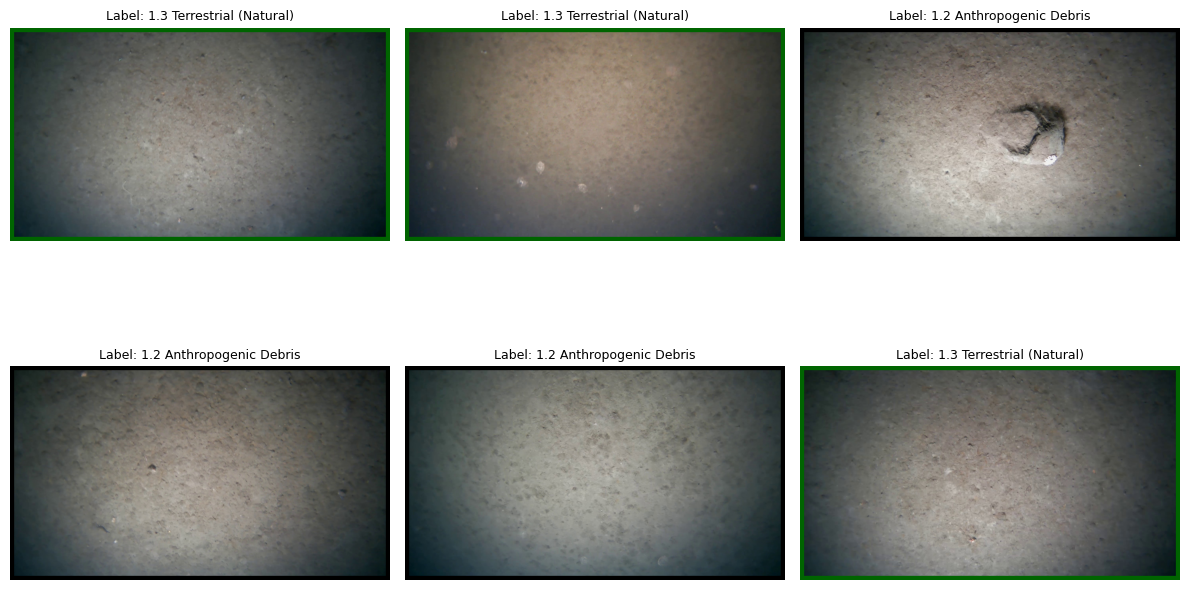

In [8]:
analysis.show_sample_images(labels=whole_frame_annotations)

In [ ]:

finetuning_parameters = FineTuningParameters()
finetuning_parameters.display_widgets()
# Click Apply!

# Parameters for fine tuning

In [11]:

config_finetuning = finetuning_parameters.get_config()
fine_tuning = FineTuning(config,config_finetuning)


# Preprocessing the dataset

In [12]:
fine_tuning.preprocess_dataset()

Computing mean and std: 100%|██████████| 7/7 [00:01<00:00,  4.90it/s]

Dataset Mean: tensor([0.5299, 0.5085, 0.4790])
Dataset Std: tensor([0.1084, 0.1006, 0.0946])


# Loading the dataset

In [13]:
fine_tuning.load_dataset()


# Fine tuning the model

In [14]:
fine_tuning.fine_tune_model()

resnet18 Model loaded with pretrained weights from torchvision to cuda


Validation Epoch 1/50: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Epoch 1/50, Train Loss: 4.4494, Train Accuracy: 50.87%, Valid Loss: 0.6852, Valid Accuracy: 66.67%
Model saved to checkpoints/model_Adventfjorden.pt


Validation Epoch 2/50: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]


Epoch 2/50, Train Loss: 4.0598, Train Accuracy: 58.96%, Valid Loss: 0.6444, Valid Accuracy: 80.95%
Model saved to checkpoints/model_Adventfjorden.pt


Validation Epoch 3/50: 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]


Epoch 3/50, Train Loss: 3.7446, Train Accuracy: 65.32%, Valid Loss: 0.6030, Valid Accuracy: 80.95%


Validation Epoch 4/50: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]


Epoch 4/50, Train Loss: 3.3068, Train Accuracy: 67.63%, Valid Loss: 0.5627, Valid Accuracy: 80.95%


Validation Epoch 5/50: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

Epoch 5/50, Train Loss: 2.9698, Train Accuracy: 73.41%, Valid Loss: 0.5435, Valid Accuracy: 80.95%
Early stopping triggered.
Fine-tuning complete!



# Evaluation on the test set


Evaluating on test set...


Testing: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]


Classification Report:
                           precision    recall  f1-score   support

 1.2 Anthropogenic Debris       0.67      0.20      0.31        10
1.3 Terrestrial (Natural)       0.60      0.92      0.73        13

                 accuracy                           0.61        23
                macro avg       0.63      0.56      0.52        23
             weighted avg       0.63      0.61      0.54        23



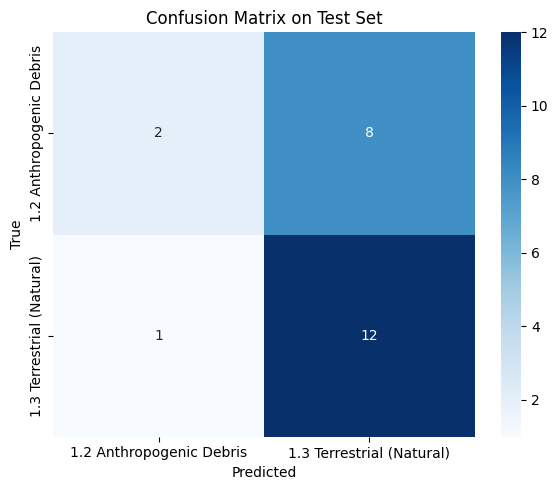

In [15]:
fine_tuning.evaluation()

# Do inference on the rest of dataset set
### These could be future unlabelled data, for the sake of this demo, I split the dataset into 25% for finetuning and 75% for the inference but 

In [ ]:
if set_demo:
    Unlabelled_data_dir=None #It will assume the directory of the inference set extracted above, change it to your directory of preference if desried
    fine_tuning.classify_images(whole_frame_annotations,point_annotations,image_dir='/media/hassan/Data_vault1/datasets_hassan/Bridging-the-gap/Tasmania/inference_dataset')
else:
    Unlabelled_data_dir = 'Unlabelled_data_directory' #Replace with the directory containing unlabelled imagery to classify them (valid for wholeframe annotations)
    fine_tuning.classify_images(whole_frame_annotations,point_annotations, image_dir=Unlabelled_data_dir)


Inferring...: 100%|██████████| 646/646 [00:07<00:00, 81.85it/s]
